In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix


In [62]:
data = pd.read_excel("EvaluasiTingkatStress.xlsx")
df = pd.DataFrame(data.loc[:, ['Usia', 'Jenis Kelamin', 'Status', 'Bekerja', 'Jam Tidur Perhari', 'Kesibukan Perhari', 'Frequency of Anger', 'Lack of Control', 'Anxiety and Stress', 'Self-Efficacy', 'Perceived Control', 'Perceived Overwhelm', 'Feeling of Mastery', 'Cumulative Difficulty']])
# Calculate the total score and add it as a new column 'Score'
df['Score'] = df[['Frequency of Anger', 'Lack of Control', 'Anxiety and Stress', 'Self-Efficacy', 'Perceived Control', 'Perceived Overwhelm', 'Feeling of Mastery', 'Cumulative Difficulty']].sum(axis=1)
# Display the DataFrame with the total score
df


,Usia,Jenis Kelamin,Status,Bekerja,Jam Tidur Perhari,Kesibukan Perhari,Frequency of Anger,Lack of Control,Anxiety and Stress,Self-Efficacy,Perceived Control,Perceived Overwhelm,Feeling of Mastery,Cumulative Difficulty,Score
0,19,Perempuan,Mahasiswa,Tidak,1,8,4,3,5,2,3,5,1,5,28
1,20,Laki-laki,Mahasiswa,Ya,3,15,5,5,5,4,3,2,1,2,27
2,22,Perempuan,Mahasiswa,Tidak,3,8,5,5,5,2,2,5,1,5,30
3,18,Perempuan,Mahasiswa,Ya,3,10,4,3,5,2,2,4,1,4,25
4,18,Perempuan,Mahasiswa,Tidak,3,4,3,5,5,2,1,5,1,5,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,20,Perempuan,Mahasiswa,Tidak,10,8,1,2,1,2,1,2,3,1,13
194,18,Perempuan,Mahasiswa,Tidak,8,9,4,3,4,2,2,3,2,4,24
195,19,Perempuan,Mahasiswa,Tidak,8,10,5,5,5,5,3,5,3,5,36
196,22,Laki-laki,Mahasiswa,Ya,8,12,3,2,2,4,4,2,1,3,21


In [63]:
# Mendeteksi missing value pada variabel
if df.isnull().values.any():
    print("\n---Berikut nilai-nilai yang hilang pada data:---")
    print("")
    print(df[df.isnull().any(axis=1)])
else:
    print("\n---Tidak terdapat missing value pada data---")

# Mengganti missing value dengan mean
if df.isnull().values.any():
    df = df.fillna(df.mean())
    print("\n---Berikut hasil missing value pada data yang sudah diperbaiki:---")
    print("")
    print(df)
else:
    print("")



---Tidak terdapat missing value pada data---



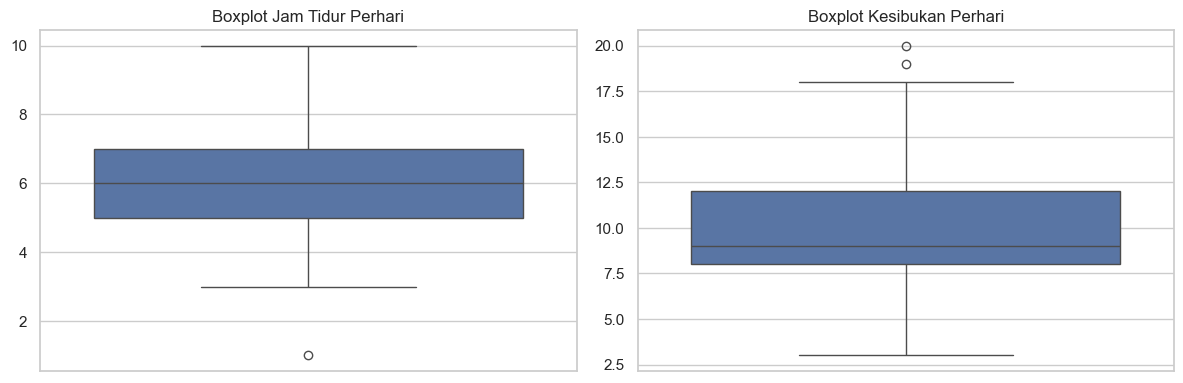

Outliers for Jam Tidur Perhari:
[1]
Outliers for Kesibukan Perhari:
[20 19]


In [64]:
# Variabel input yang akan divisualisasikan
vars_to_plot = ['Jam Tidur Perhari', 'Kesibukan Perhari']

# Membuat satu gambar yang berisi boxplot untuk masing-masing variabel input
fig, axes = plt.subplots(1, len(vars_to_plot), figsize=(12, 4))
fig.subplots_adjust(wspace=0.5)

outliers_data = {}  # Dictionary untuk menyimpan nilai outlier

for i, var in enumerate(vars_to_plot):
    ax = axes[i]
    sns.boxplot(y=df[var], ax=ax)
    ax.set_title(f'Boxplot {var}')
    ax.set_ylabel('')

    # Menghitung nilai outlier
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    outliers = df[(df[var] > upper_bound) | (df[var] < lower_bound)][var]
    
    # Menyimpan nilai outlier ke dalam dictionary
    outliers_data[var] = outliers

# Mengatur tata letak subplot
plt.tight_layout()
plt.show()

# Mencetak nilai outlier
for var, outliers in outliers_data.items():
    print(f'Outliers for {var}:')
    print(outliers.values)  # Mencetak nilai outlier dari dictionary

Handling outliers for Jam Tidur Perhari with mean value.
[1]
Handling outliers for Kesibukan Perhari with mean value.
[20 19]


C:\Users\Airlangga\AppData\Local\Temp\ipykernel_23108\2356428290.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '6.505050505050505' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[var].isin(outliers), var] = mean_value
C:\Users\Airlangga\AppData\Local\Temp\ipykernel_23108\2356428290.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '9.98989898989899' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[var].isin(outliers), var] = mean_value


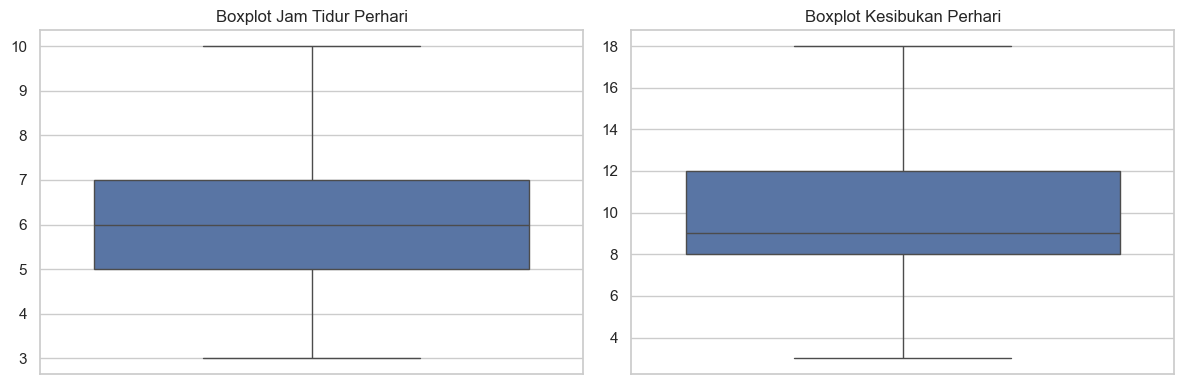

In [65]:
# Mengganti outlier dengan nilai mean
for var, outliers in outliers_data.items():
    if not outliers.empty:
        # Hitung nilai mean variabel
        mean_value = df[var].mean()
        
        # Ganti outlier dengan nilai mean
        df.loc[df[var].isin(outliers), var] = mean_value

# Sekarang, outlier telah diganti dengan nilai mean. Anda dapat mengeceknya dengan kode berikut:
for var, outliers in outliers_data.items():
    if not outliers.empty:
        print(f'Handling outliers for {var} with mean value.')
        print(outliers.values)  # Mencetak nilai outlier yang telah diganti dengan nilai mean

# Membuat satu gambar yang berisi boxplot untuk masing-masing variabel input
fig, axes = plt.subplots(1, len(vars_to_plot), figsize=(12, 4))
fig.subplots_adjust(wspace=0.5)

for i, var in enumerate(vars_to_plot):
    ax = axes[i]
    sns.boxplot(y=df[var], ax=ax)
    ax.set_title(f'Boxplot {var}')
    ax.set_ylabel('')

# Mengatur tata letak subplot
plt.tight_layout()
plt.show()

In [66]:
df['Jenis Kelamin'].replace({'Laki-laki':0, 'Perempuan':1}, inplace=True)
df['Status'].replace({'Pelajar':0,'Mahasiswa':1,'Lainnya':2}, inplace=True)
df['Bekerja'].replace({'Tidak':0,'Ya':1}, inplace=True)

In [67]:
from sklearn.preprocessing import MinMaxScaler
# Normalisasi data numerik
numerical_cols = ['Usia','Jam Tidur Perhari', 'Kesibukan Perhari','Score']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Pemilihan fitur
selected_features = ['Usia', 'Jenis Kelamin', 'Status', 'Bekerja', 'Jam Tidur Perhari','Kesibukan Perhari',
                     'Frequency of Anger', 'Lack of Control', 'Anxiety and Stress', 'Self-Efficacy',
                     'Perceived Control', 'Perceived Overwhelm', 'Feeling of Mastery', 'Cumulative Difficulty','Score']

X1 = df[selected_features]

c:\Users\Airlangga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Airlangga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Airlangga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Airlangga\AppData\Local\Programs\Python\Python311\Lib\site-packa

Number of Clusters: 2, Silhouette Score: 0.41288455163889004
Number of Clusters: 3, Silhouette Score: 0.28353458560010353
Number of Clusters: 4, Silhouette Score: 0.258243219921454
Number of Clusters: 5, Silhouette Score: 0.22856714333884864
Number of Clusters: 6, Silhouette Score: 0.22602679038048396
Number of Clusters: 7, Silhouette Score: 0.21057811350801764
Number of Clusters: 8, Silhouette Score: 0.22558261170481964
Number of Clusters: 9, Silhouette Score: 0.21633753628823674
Number of Clusters: 10, Silhouette Score: 0.2306684846129611


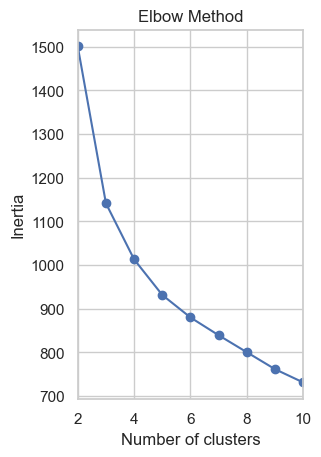

In [68]:
inertia = []
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X1)
    
    inertia.append(kmeans.inertia_)
    
    if len(set(kmeans.labels_)) > 1:  # Silhouette score requires at least 2 different clusters
        silhouette_scores.append(silhouette_score(X1, kmeans.labels_))
    else:
        silhouette_scores.append(None)

# Print Silhouette Scores
for i, score in enumerate(silhouette_scores):
    print(f'Number of Clusters: {i+2}, Silhouette Score: {score}')

# Plot Elbow Method
plt.subplot(1,2,1)
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xlim([2, 10])  # Set batas sumbu x dari 2 hingga 10
# Pilih jumlah cluster yang optimal (contoh: 3)
n_clusters = 3

# Penerapan K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=55)
df['Cluster'] = kmeans.fit_predict(X1)

In [69]:
# Menampilkan distribusi untuk setiap cluster
cluster_distribution = df.groupby('Cluster')[selected_features].apply(lambda x: x.describe())
print("\nDistribusi untuk Setiap Cluster:")
print(cluster_distribution)

# Memberikan label untuk tingkatan cluster
def label_clusters(row):
    if row['Cluster'] == 1:
        return 'Low Stress'
    elif row['Cluster'] == 2:
        return 'Stress Moderated'
    elif row['Cluster'] == 0:
        return 'High Perceived Stress'

# Menambahkan kolom 'Tingkat Stress' ke DataFrame
df['Tingkat Stress'] = df.apply(label_clusters, axis=1)

# Menampilkan hasil clustering dengan label tingkatan cluster
print("\nHasil Clustering dengan Label Tingkatan Cluster:")
df

# Menampilkan jumlah anggota tiap cluster
print("\nJumlah Anggota Tiap Cluster:")
cluster_counts = df['Cluster'].value_counts()
for cluster_num, count in cluster_counts.items():
    print(f"{label_clusters({'Cluster': cluster_num})}: {count} anggota")


Distribusi untuk Setiap Cluster:
                    Usia  Jenis Kelamin     Status    Bekerja  \
Cluster                                                         
0       count  94.000000      94.000000  94.000000  94.000000   
        mean    0.276596       0.702128   0.989362   0.095745   
        std     0.087283       0.459775   0.274143   0.295818   
        min     0.050000       0.000000   0.000000   0.000000   
        25%     0.200000       0.000000   1.000000   0.000000   
        50%     0.300000       1.000000   1.000000   0.000000   
        75%     0.300000       1.000000   1.000000   0.000000   
        max     0.650000       1.000000   2.000000   1.000000   
1       count  27.000000      27.000000  27.000000  27.000000   
        mean    0.288889       1.000000   0.962963   0.000000   
        std     0.057735       0.000000   0.192450   0.000000   
        min     0.000000       1.000000   0.000000   0.000000   
        25%     0.300000       1.000000   1.000000   0.0

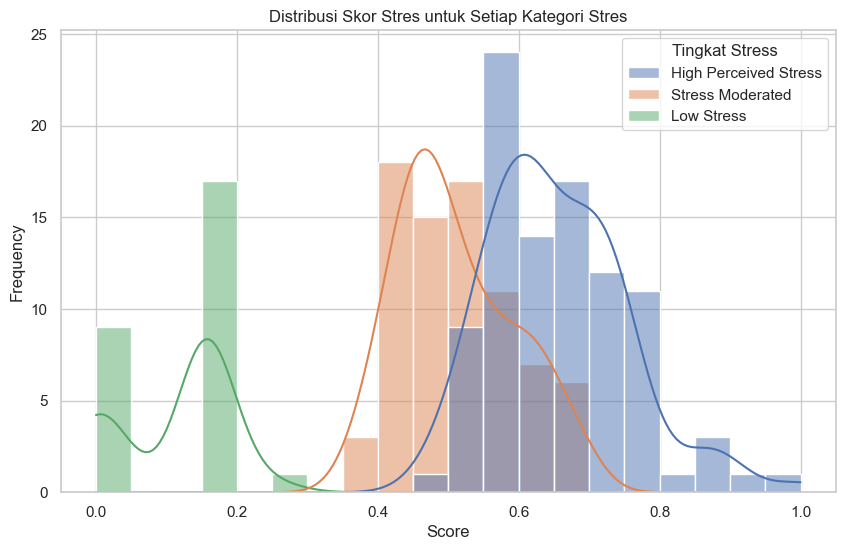

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analisis distribusi skor stres untuk setiap kategori stres
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Score', hue='Tingkat Stress', bins=20, kde=True)
plt.title('Distribusi Skor Stres untuk Setiap Kategori Stres')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


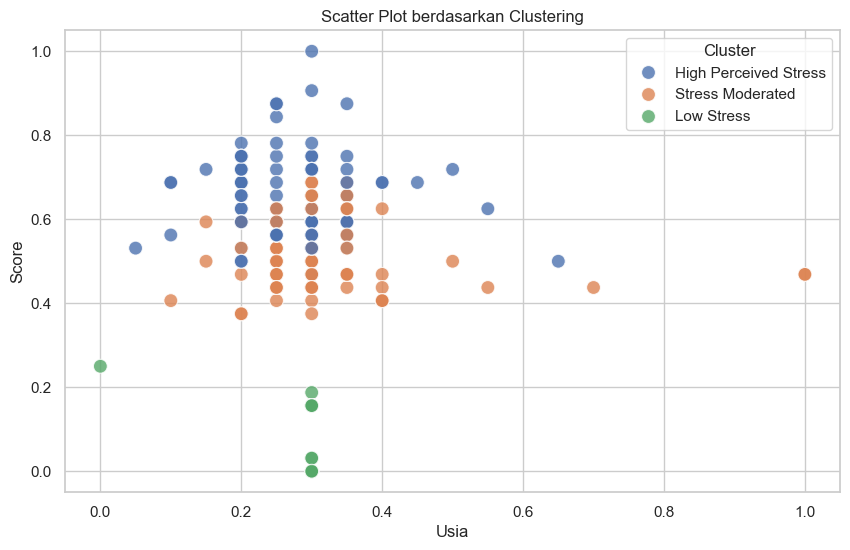

In [71]:
# Set style for seaborn
sns.set(style="whitegrid")

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Usia', y='Score', hue='Tingkat Stress', data=df, s=100, alpha=0.8)
plt.title('Scatter Plot berdasarkan Clustering')
plt.xlabel('Usia')
plt.ylabel('Score')
plt.legend(title='Cluster')
plt.show()


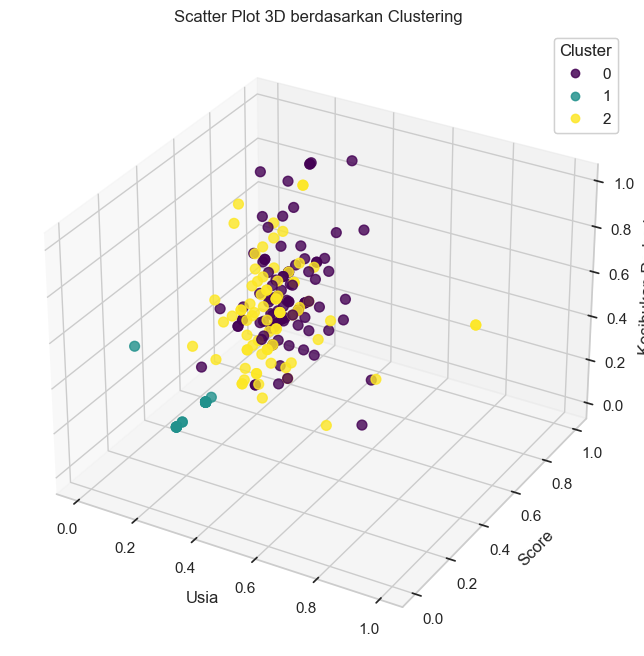

In [72]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['Usia'],
    df['Score'],
    df['Kesibukan Perhari'],
    c=df['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.8
)

ax.set_xlabel('Usia')
ax.set_ylabel('Score')
ax.set_zlabel('Kesibukan Perhari')
ax.set_title('Scatter Plot 3D berdasarkan Clustering')

legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

plt.show()


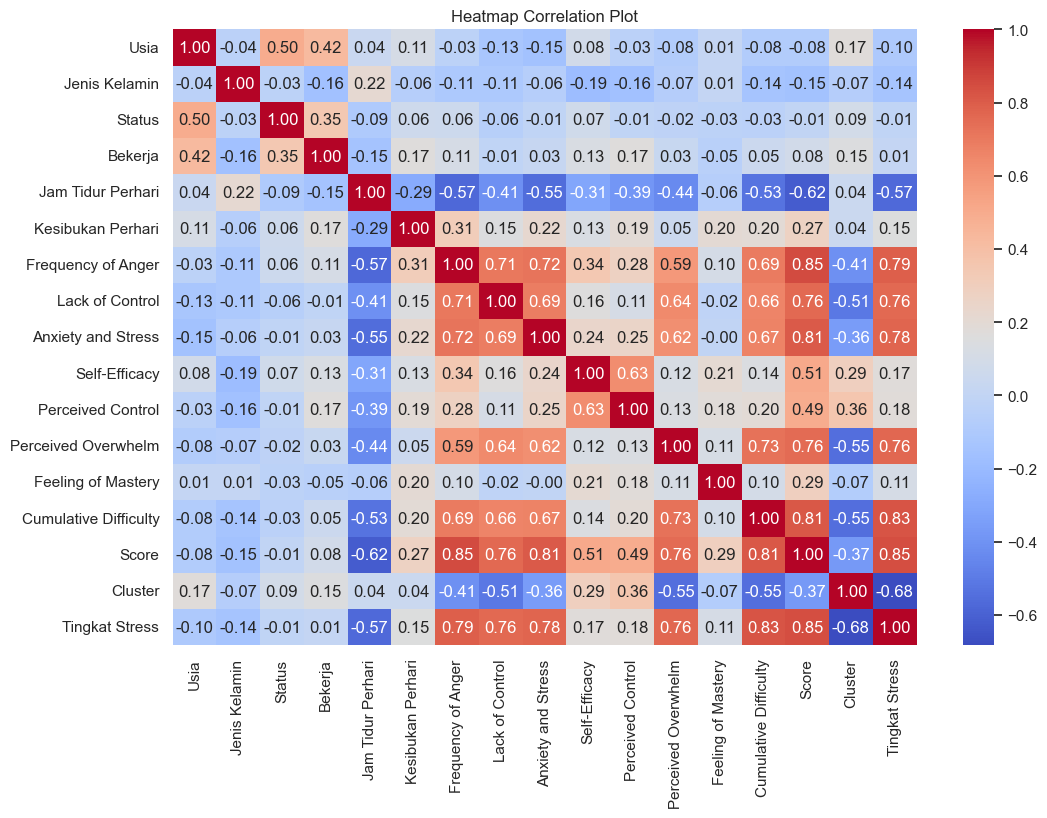

In [73]:
df['Tingkat Stress'].replace({'Low Stress':0, 'Stress Moderated':1, 'High Perceived Stress':2,}, inplace=True)
# Menghitung matriks korelasi
corr_matrix = df.corr()

# Membuat Heatmap Correlation Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Correlation Plot')
plt.show()

In [74]:
y = df["Tingkat Stress"]
X = df.drop(["Usia","Jenis Kelamin","Status","Bekerja","Jam Tidur Perhari","Kesibukan Perhari","Cluster","Score","Tingkat Stress"], axis = 1)

In [75]:
X

,Frequency of Anger,Lack of Control,Anxiety and Stress,Self-Efficacy,Perceived Control,Perceived Overwhelm,Feeling of Mastery,Cumulative Difficulty
0,4,3,5,2,3,5,1,5
1,5,5,5,4,3,2,1,2
2,5,5,5,2,2,5,1,5
3,4,3,5,2,2,4,1,4
4,3,5,5,2,1,5,1,5
...,...,...,...,...,...,...,...,...
193,1,2,1,2,1,2,3,1
194,4,3,4,2,2,3,2,4
195,5,5,5,5,3,5,3,5
196,3,2,2,4,4,2,1,3


In [76]:
df['Tingkat Stress'].replace({0:'Low Stress', 1:'Stress Moderated', 2:'High Perceived Stress'}, inplace=True)

In [77]:
# Split into test and training sets
test_size = 0.33
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=100)

In [78]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
X_test

array([[-0.36146243, -1.26025208, -0.46514729,  0.91374293,  0.35408492,
        -1.23332329,  0.42537148, -0.26175263],
       [ 0.47560845,  1.38027608,  0.34274011, -1.03164525,  0.35408492,
         1.70882142,  0.42537148,  1.24047987],
       [-0.36146243,  0.50010003, -0.46514729, -0.05895116, -0.58069926,
         0.72810652, -0.51044577,  0.48936362],
       [-0.36146243, -0.38007602,  0.34274011,  0.91374293,  1.2888691 ,
        -0.25260838,  1.36118872, -0.26175263],
       [-0.36146243, -1.26025208, -0.46514729,  0.91374293,  0.35408492,
         0.72810652,  0.42537148, -0.26175263],
       [-2.03560419, -1.26025208, -2.08092209, -1.03164525, -1.51548344,
        -1.23332329,  0.42537148, -1.76398514],
       [-0.36146243,  0.50010003,  1.15062751, -1.03164525, -0.58069926,
         1.70882142,  0.42537148,  0.48936362],
       [ 0.47560845,  0.50010003,  0.34274011, -0.05895116,  0.35408492,
        -0.25260838,  0.42537148,  0.48936362],
       [ 1.31267933, -0.38007602


====== Decision Tree ======
Precision (Decision Tree): 0.8848484848484849
Recall (Decision Tree): 0.8787878787878788
F1 Score (Decision Tree): 0.8801476301476301
Test Accuracy (Decision Tree): 0.8787878787878788
=====Confusion Matrix=====


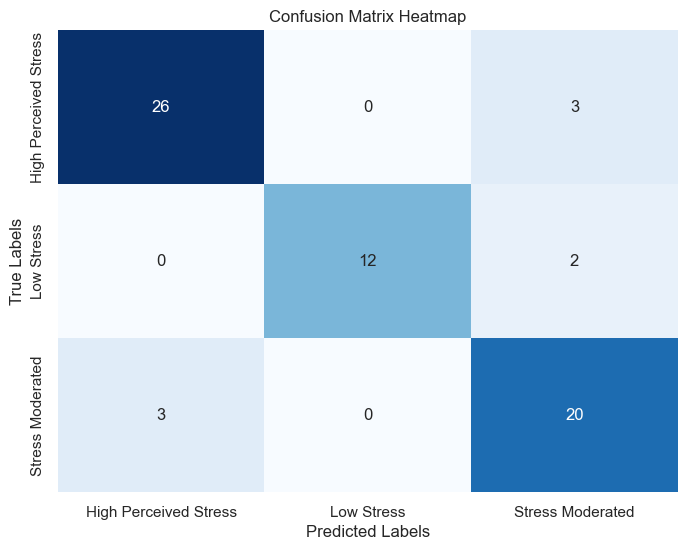

In [80]:
# Decision Tree
model_dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model_dt.fit(X_train, y_train)
predictions_test_dt = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, predictions_test_dt)
precision_dt = precision_score(y_test, predictions_test_dt, average='weighted', zero_division=1)
recall_dt = recall_score(y_test, predictions_test_dt, average='weighted')
f1_dt = f1_score(y_test, predictions_test_dt, average='weighted')
print("\n====== Decision Tree ======")
print(f"Precision (Decision Tree): {precision_dt}")
print(f"Recall (Decision Tree): {recall_dt}")
print(f"F1 Score (Decision Tree): {f1_dt}")
print(f"Test Accuracy (Decision Tree): {accuracy_dt}")
print("=====Confusion Matrix=====")
cm_dt = confusion_matrix(y_test, predictions_test_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=model_dt.classes_, yticklabels=model_dt.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


====== Random Forest ======
Precision (Random Forest): 0.9702020202020202
Recall (Random Forest): 0.9696969696969697
F1 Score (Random Forest): 0.9695447887538282
Test Accuracy (Random Forest): 0.9696969696969697
=====Confusion Matrix=====


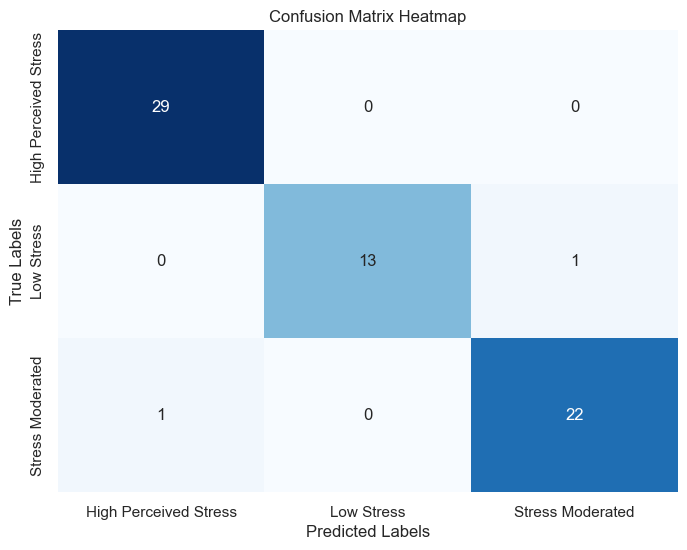

In [81]:
# Random Forest
model_rf = RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100, random_state=100)
model_rf.fit(X_train, y_train)
predictions_test_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_test_rf)
precision_rf = precision_score(y_test, predictions_test_rf, average='weighted', zero_division=1)
recall_rf = recall_score(y_test, predictions_test_rf, average='weighted')
f1_rf = f1_score(y_test, predictions_test_rf, average='weighted')
print("\n====== Random Forest ======")
print(f"Precision (Random Forest): {precision_rf}")
print(f"Recall (Random Forest): {recall_rf}")
print(f"F1 Score (Random Forest): {f1_rf}")
print(f"Test Accuracy (Random Forest): {accuracy_rf}")
print("=====Confusion Matrix=====")
cm_rf = confusion_matrix(y_test, predictions_test_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


====== K Neighbors Classifier ======
Precision (K Neighbors Classifier): 0.9170419363917814
Recall (K Neighbors Classifier): 0.9090909090909091
F1 Score (K Neighbors Classifier): 0.9074875741542406
Test Accuracy (K Neighbors Classifier): 0.9090909090909091
=====Confusion Matrix=====


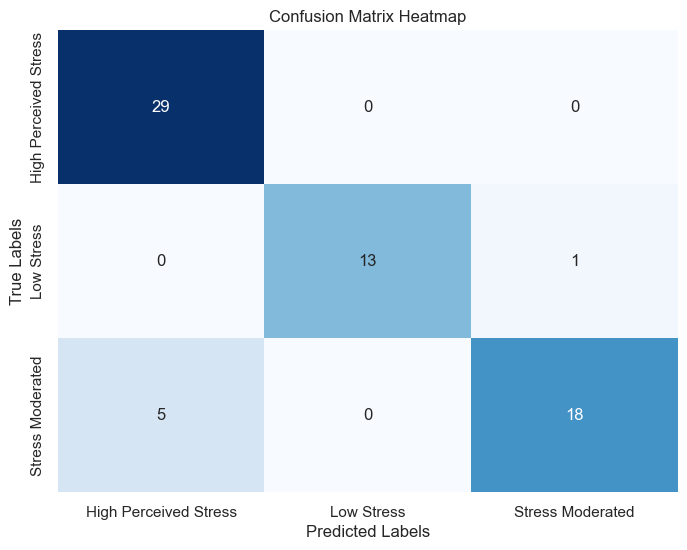

In [82]:
# K Neighbors Classifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
predictions_test_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, predictions_test_knn)
precision_knn = precision_score(y_test, predictions_test_knn, average='weighted', zero_division=1)
recall_knn = recall_score(y_test, predictions_test_knn, average='weighted')
f1_knn = f1_score(y_test, predictions_test_knn, average='weighted')
print("\n====== K Neighbors Classifier ======")
print(f"Precision (K Neighbors Classifier): {precision_knn}")
print(f"Recall (K Neighbors Classifier): {recall_knn}")
print(f"F1 Score (K Neighbors Classifier): {f1_knn}")
print(f"Test Accuracy (K Neighbors Classifier): {accuracy_knn}")
print("=====Confusion Matrix=====")
cm_knn = confusion_matrix(y_test, predictions_test_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=model_knn.classes_, yticklabels=model_knn.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


====== Support Vector Machine ======
Precision (Support Vector Machine): 0.9702020202020202
Recall (Support Vector Machine): 0.9696969696969697
F1 Score (Support Vector Machine): 0.9695447887538282
Test Accuracy (Support Vector Machine): 0.9696969696969697
=====Confusion Matrix=====


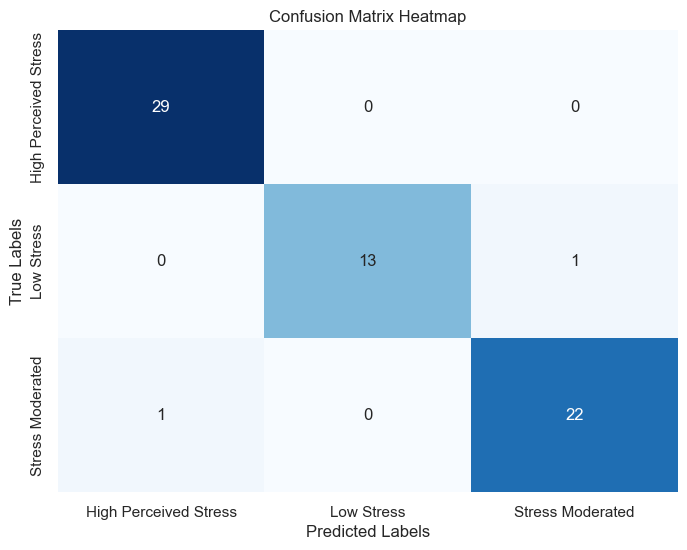

In [83]:
# Support Vector Machine
model_svm = SVC()
model_svm.fit(X_train, y_train)
predictions_test_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, predictions_test_svm)
precision_svm = precision_score(y_test, predictions_test_svm, average='weighted', zero_division=1)
recall_svm = recall_score(y_test, predictions_test_svm, average='weighted')
f1_svm = f1_score(y_test, predictions_test_svm, average='weighted')
print("\n====== Support Vector Machine ======")
print(f"Precision (Support Vector Machine): {precision_svm}")
print(f"Recall (Support Vector Machine): {recall_svm}")
print(f"F1 Score (Support Vector Machine): {f1_svm}")
print(f"Test Accuracy (Support Vector Machine): {accuracy_svm}")
print("=====Confusion Matrix=====")
cm_svm = confusion_matrix(y_test, predictions_test_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=model_svm.classes_, yticklabels=model_svm.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


====== Logistic Regression ======
Precision (Logistic Regression): 0.9702020202020202
Recall (Logistic Regression): 0.9696969696969697
F1 Score (Logistic Regression): 0.9695447887538282
Test Accuracy (Logistic Regression): 0.9696969696969697
=====Confusion Matrix=====


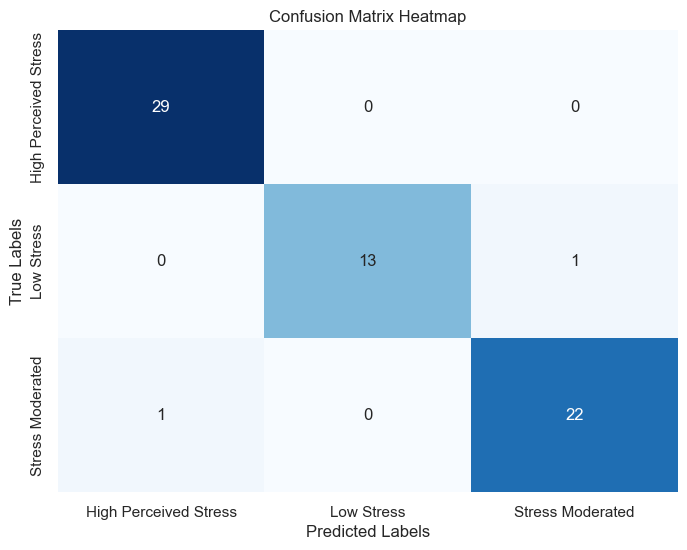

In [84]:
# Logistic Regression
model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train, y_train)
predictions_test_logreg = model_logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, predictions_test_logreg)
precision_logreg = precision_score(y_test, predictions_test_logreg, average='weighted', zero_division=1)
recall_logreg = recall_score(y_test, predictions_test_logreg, average='weighted')
f1_logreg = f1_score(y_test, predictions_test_logreg, average='weighted')
print("\n====== Logistic Regression ======")
print(f"Precision (Logistic Regression): {precision_logreg}")
print(f"Recall (Logistic Regression): {recall_logreg}")
print(f"F1 Score (Logistic Regression): {f1_logreg}")
print(f"Test Accuracy (Logistic Regression): {accuracy_logreg}")
print("=====Confusion Matrix=====")
cm_logreg = confusion_matrix(y_test, predictions_test_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=model_logreg.classes_, yticklabels=model_logreg.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [85]:
# creating an object of predictors from the test data
y_hat = model_logreg.predict(X_test)
# Print metrics: recall, precision and f1
print(classification_report(y_test, y_hat, output_dict=False))
accuracy_logreg = accuracy_score(y_test, y_hat)
print(accuracy_logreg)

                       precision    recall  f1-score   support

High Perceived Stress       0.97      1.00      0.98        29
           Low Stress       1.00      0.93      0.96        14
     Stress Moderated       0.96      0.96      0.96        23

             accuracy                           0.97        66
            macro avg       0.97      0.96      0.97        66
         weighted avg       0.97      0.97      0.97        66

0.9696969696969697



====== Naive Bayes ======
Precision (Naive Bayes): 0.9563131313131312
Recall (Naive Bayes): 0.9545454545454546
F1 Score (Naive Bayes): 0.9539919150449261
Test Accuracy (Naive Bayes): 0.9545454545454546
=====Confusion Matrix=====


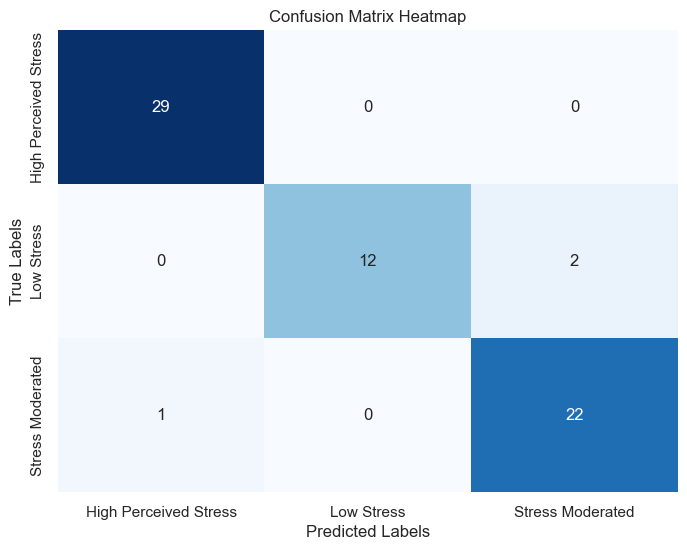

In [86]:
# Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
predictions_test_nb = model_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, predictions_test_nb)
precision_nb = precision_score(y_test, predictions_test_nb, average='weighted', zero_division=1)
recall_nb = recall_score(y_test, predictions_test_nb, average='weighted')
f1_nb = f1_score(y_test, predictions_test_nb, average='weighted')
print("\n====== Naive Bayes ======")
print(f"Precision (Naive Bayes): {precision_nb}")
print(f"Recall (Naive Bayes): {recall_nb}")
print(f"F1 Score (Naive Bayes): {f1_nb}")
print(f"Test Accuracy (Naive Bayes): {accuracy_nb}")
print("=====Confusion Matrix=====")
cm_nb = confusion_matrix(y_test, predictions_test_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=model_nb.classes_, yticklabels=model_nb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [87]:
# Find and print the model with the highest accuracy
model_metrics = {
    "Decision Tree": {"Accuracy": accuracy_dt, "Precision": precision_dt, "Recall": recall_dt, "F1": f1_dt},
    "Random Forest": {"Accuracy": accuracy_rf, "Precision": precision_rf, "Recall": recall_rf, "F1": f1_rf},
    "K-Nearest Neighbors": {"Accuracy": accuracy_knn, "Precision": precision_knn, "Recall": recall_knn, "F1": f1_knn},
    "Support Vector Machine": {"Accuracy": accuracy_svm, "Precision": precision_svm, "Recall": recall_svm, "F1": f1_svm},
    "Logistic Regression": {"Accuracy": accuracy_logreg, "Precision": precision_logreg, "Recall": recall_logreg, "F1": f1_logreg},
    "Naive Bayes": {"Accuracy": accuracy_nb, "Precision": precision_nb, "Recall": recall_nb, "F1": f1_nb},
}

best_model = max(model_metrics, key=lambda k: model_metrics[k]["Accuracy"])
print(f"\nThe model with the highest accuracy is: {best_model} with accuracy {model_metrics[best_model]['Accuracy']}")


The model with the highest accuracy is: Random Forest with accuracy 0.9696969696969697


PREDIKSI

In [88]:
df

,Usia,Jenis Kelamin,Status,Bekerja,Jam Tidur Perhari,Kesibukan Perhari,Frequency of Anger,Lack of Control,Anxiety and Stress,Self-Efficacy,Perceived Control,Perceived Overwhelm,Feeling of Mastery,Cumulative Difficulty,Score,Cluster,Tingkat Stress
0,0.25,1,1,0,0.500722,0.333333,4,3,5,2,3,5,1,5,0.62500,0,High Perceived Stress
1,0.30,0,1,1,0.000000,0.800000,5,5,5,4,3,2,1,2,0.59375,2,Stress Moderated
2,0.40,1,1,0,0.000000,0.333333,5,5,5,2,2,5,1,5,0.68750,0,High Perceived Stress
3,0.20,1,1,1,0.000000,0.466667,4,3,5,2,2,4,1,4,0.53125,0,High Perceived Stress
4,0.20,1,1,0,0.000000,0.066667,3,5,5,2,1,5,1,5,0.59375,0,High Perceived Stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.30,1,1,0,1.000000,0.333333,1,2,1,2,1,2,3,1,0.15625,1,Low Stress
194,0.20,1,1,0,0.714286,0.400000,4,3,4,2,2,3,2,4,0.50000,0,High Perceived Stress
195,0.25,1,1,0,0.714286,0.466667,5,5,5,5,3,5,3,5,0.87500,0,High Perceived Stress
196,0.40,0,1,1,0.714286,0.600000,3,2,2,4,4,2,1,3,0.40625,2,Stress Moderated


In [89]:
# Data input
FrequencyofAnger = 5
LackofControl = 5
AnxietyandStress = 5
SelfEfficacy = 4
PerceivedControl = 4
PerceivedOverwhelm = 5
FeelingofMastery = 5
CumulativeDifficulty = 5

# Create a numpy array with input features
input_data = np.array([
    FrequencyofAnger,
    LackofControl,
    AnxietyandStress,
    SelfEfficacy,
    PerceivedControl,
    PerceivedOverwhelm,
    FeelingofMastery,
    CumulativeDifficulty
]).reshape(1, -1)

# Transform the input data
scaled_data = scaler.transform(input_data)

# Print the scaled data
print("Scaled Data:")
print(scaled_data)

# Predict using the scaled data
prediction = model_rf.predict(scaled_data)

# Print the prediction
print("Prediction:")
print(prediction)


Scaled Data:
[[1.31267933 1.38027608 1.15062751 0.91374293 1.2888691  1.70882142
  2.29700597 1.24047987]]
Prediction:
['High Perceived Stress']


c:\Users\Airlangga\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


MENYIMPAN MODEL KLASIFIKASI LOGISTIC REGRESSION

In [90]:
import pickle

# Save the model and scaler
model_data = {'model': model_rf, 'scaler': scaler}
filename = 'stressLevel.sav'
pickle.dump(model_data, open(filename, 'wb'))